In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/mooc.xlsx')

df.head()

Mounted at /content/drive


,Nom et prénom,Note de communication,Note des mathématiques,Note d'informatique,Note du prétest,test formatif 1,test formatif 2,test formatif 3,test sommatif
0,Zakka Yahya,17.5,16.5,20.0,15.0,13.0,12.0,14.0,13.5
1,Chahir Mohamed Ali,19.0,13.0,18.0,13.0,14.0,13.5,11.0,14.0
2,El Baski Basma,14.0,10.0,15.0,11.0,10.0,11.0,12.5,11.5
3,Baba Lamyae,12.0,11.0,10.0,10.0,9.5,12.0,10.0,10.5
4,Andaloussi Malak,8.0,9.5,10.0,9.0,8.0,10.5,10.0,10.5


## **Corrélation entre toutes les features**

On va utiliser maintenant des méthodes basées sur le coefficient de corrélation qui va nous permettre d'illustrer la relation entre toutes les variables de l'ensemble de données.

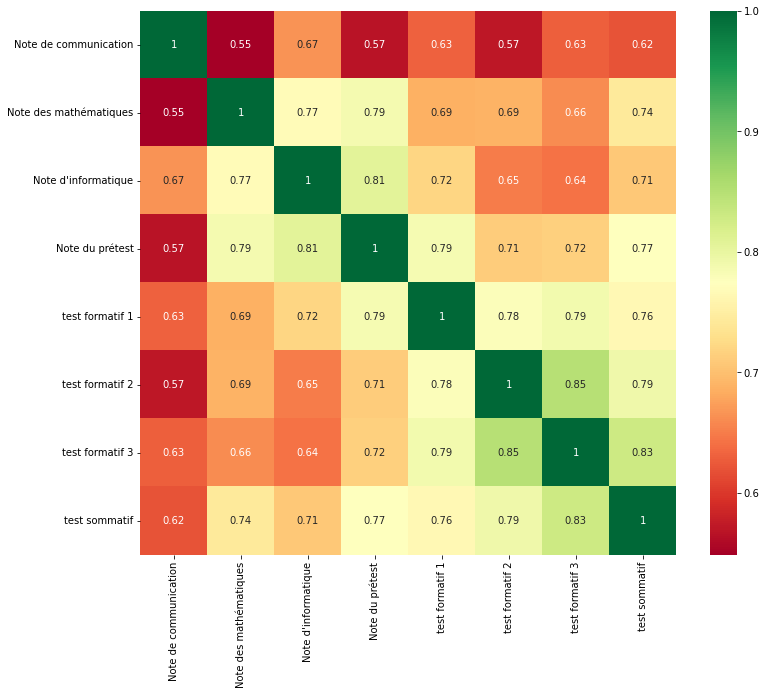

In [ ]:
# Régler la taille de la figure sur 12 par 10.
plt.figure(figsize=(12,10))

# seaborn a une méthode simple pour présenter heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Dans l'étape suivante, après avoir obtenu la matrice de corrélation, nous allons utiliser la fonction describe() qui génère des statistiques descriptives en résumant le nombre de valeurs distinctes, la dispersion, la moyenne, le minimum et le maximum et la forme de la distribution d'un ensemble de données. 

In [ ]:
# Afficher des informations à propos de nos données
df.describe()

,Note de communication,Note des mathématiques,Note d'informatique,Note du prétest,test formatif 1,test formatif 2,test formatif 3,test sommatif
count,109.000000,109.000000,109.000000,109.000000,107.000000,109.000000,109.000000,109.000000
mean,12.798165,10.944954,11.449541,10.903670,11.191589,12.041284,11.766055,12.009174
std,4.473750,3.985122,3.502608,3.533227,3.064284,3.209598,3.289693,3.296309
min,2.000000,2.000000,3.000000,2.000000,2.000000,4.500000,4.000000,3.500000
25%,10.000000,9.000000,9.500000,8.500000,9.250000,10.000000,10.000000,10.000000
50%,14.000000,10.000000,12.000000,11.500000,12.000000,12.500000,12.500000,13.000000
75%,16.000000,14.000000,14.000000,13.000000,13.500000,14.000000,14.000000,14.000000
max,20.000000,19.000000,20.000000,17.000000,16.000000,17.000000,17.000000,17.000000


L'analyse de la matrice de corrélation, ainsi que les résultats obtenus par le fonction describe(), nous ont permis d'identifier facilement les paramètres les plus utiles pour regrouper les apprenants ayant les mêmes prérequis et niveaux d'apprentissage, à savoir : communication, mathématiques, informatique, pré-test, test formatif et test sommatif.


## **Classification et regroupement des apprenants**

Après avoir identifié les paramètres dans l'étape précédente, One passe à la de classification et du regroupement des apprenants. Il existe plusieurs façons de procéder, mais dans notre cas, nous avons choisi d'utiliser les k-means pour la classification et la régression pour la prédiction. Suite à l'étude et à l'analyse de l'ensemble des données, il est possible de diviser les apprenants en trois groupes :

- Groupe A (Les plus avancés) : ce sont les étudiants qui ont une excellente formation en mathématiques, en informatique et en communication qui leur a permis de comprendre facilement les chapitres et de réussir les tests formatifs à la fin de chaque chapitre. Ce groupe d'apprenants, a montré son sérieux et sa forte volonté et son intérêt à suivre le MOOC jusqu'au bout, c'est ce que l'équipe pédagogique a remarqué car ils ont montré leurs engagements, notamment lors de la réalisation des activités demandées par leur enseignant et le temps, qu'ils ont passé connectés sur la plateforme en suivant les cours et les vidéos ainsi que leurs interactions sur le forum.


- Groupe B (apprenants moyens) : déjà ceux qui ont un niveau moyen en mathématiques, en informatique et en communication ont eu des notes moyennes avec l'évolution de certains éléments.


- Groupe C (apprenants en difficulté) : ce sont ceux qui ont des lacunes en mathématiques, en informatique et en communication. Ceux qui sont proches de la moyenne ont pu progresser et valider certains tests formatifs grâce, également, à la remédiation proposée à la fin de chaque test formatif.

In [ ]:
# le nombre de valeurs nulles de notre jeu de données.
df.isnull().sum()

Nom et prénom             0
Note de communication     0
Note des mathématiques    0
Note d'informatique       0
Note du prétest           0
test formatif 1           2
test formatif 2           0
test formatif 3           0
test sommatif             0
dtype: int64

In [ ]:
df['test formatif 1'].replace(np.NaN , np.mean(all(v != np.NaN for v in df['test formatif 1'].values)), inplace=True)

In [ ]:
# le nombre de valeurs nulles de notre jeu de données.
df.isnull().sum()

Nom et prénom             0
Note de communication     0
Note des mathématiques    0
Note d'informatique       0
Note du prétest           0
test formatif 1           0
test formatif 2           0
test formatif 3           0
test sommatif             0
dtype: int64

## **Construction du modèle KMeans**

In [ ]:
# Crétion du modèle avec trois groupes 
model = KMeans(n_clusters = 3)

# Entrainement du modèle
model.fit(df.iloc[ : , 1 : 8])

KMeans(n_clusters=3)

In [ ]:
# Prédictions
y_predict = model.predict(df.iloc[ : , 1 : 8])

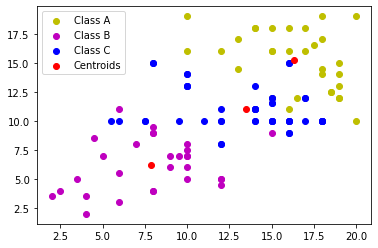

In [ ]:
# Visualisation des clusters

# Classe A 
plt.scatter(df.iloc[y_predict == 0, 1], df.iloc[y_predict == 0, 2], c = 'y', label="Class A")

# Classe B
plt.scatter(df.iloc[y_predict == 1, 1], df.iloc[y_predict == 1, 2], c = 'm', label="Class B")

# Classe C
plt.scatter(df.iloc[y_predict == 2, 1], df.iloc[y_predict == 2, 2], c = 'b', label="Class C")

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'r', label="Centroids")

plt.legend()

La figure ci-dessus montre le résultat de la classification et du regroupement des apprenants en utilisant l'algorithme K-means, les objets sont affichés sous forme de diagrammes de dispersion, chaque cluster est présenté par une couleur et chaque classe d'individu par un point, et les centres des clusters sont présentés en rouge. Les individus ayant les mêmes caractéristiques et appartenant à l'un des clusters ont les mêmes couleurs. Selon la disposition des points dans les nuages, nous pouvons qualifier la qualité de la classification et du clustering que nous avons obtenu, puisque nous avons un regroupement de chaque classe dans un côté séparé de l'autre classe, alors nous pouvons dire que c'est une bonne classification et un bon clustering.